In [1]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 62.7 MB/s eta 0:00:00


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
input_path = '/content/drive/MyDrive/Pastureland/rasters'
rasters = {
    'NDVI': input_path + '/NDVI_2019.tif',
    'SAVI': input_path + '/SAVI_2019.tif',
    'MSAVI': input_path + '/MSAVI_2019.tif',
    'NDRE': input_path + '/NDRE_2019.tif',
    'NDWI': input_path + '/NDWI_2019.tif'
}


In [16]:
styles = {
    'NDVI': {
        'bounds': [0.0, 0.1, 0.2, 0.3, 0.4, 0.6],
        'colors': ['#FFFFFF', '#CE7E45', '#F1B555', '#99B718', '#3E8601'],
        'labels': ['Bare soil', 'Sparse vegetation', 'Active growth', 'Good vigor', 'Very healthy']
    },
    'SAVI': {
        'bounds': [0.0, 0.1, 0.2, 0.3, 0.4],
        'colors': ['#f7f7f7', '#d9f0a3', '#addd8e', '#41ab5d'],
        'labels': ['Bare soil', 'Growth onset', 'Moderate vegetation', 'Dense vegetation']
    },
    'MSAVI': {
        'bounds': [0.0, 0.1, 0.2, 0.3, 0.4, 0.6],
        'colors': ['#FFFFFF', '#CE7E45', '#F1B555', '#99B718', '#3E8601'],
        'labels': ['Bare soil', 'Sparse vegetation', 'Active growth', 'Good vigor', 'Very healthy']
    },
    'NDRE': {
        'bounds': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        'colors': ['#440154', '#3B528B', '#21908C', '#5DC863', '#FDE725'],
        'labels': ['Bare soil', 'Vegetation stress', 'Moderate growth', 'Good vigor', 'Very healthy']

    },
    'NDWI': {
        'bounds': [0.0, 0.1, 0.2, 0.3, 0.4],
        'colors': ['#f7fbff', '#c6dbef', '#6baed6', '#2171b5'],
        'labels': ['Dry soil', 'Low moisture', 'Moderately moist', 'Very moist']
    }
}

In [18]:
def plot_index(name, path, style):
    with rasterio.open(path) as src:
        data = src.read(1)
        data[data == src.nodata] = np.nan

    cmap = ListedColormap(style['colors'])
    norm = BoundaryNorm(style['bounds'], len(style['colors']))

    fig, ax = plt.subplots(figsize=(8, 6))
    img = ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(f'{name} – 2019', fontsize=14)
    ax.axis('off')

    # Créer des étiquettes combinées : valeur + interprétation
    tick_labels = []
    # Iterate up to the number of labels (which is also the number of color intervals)
    for i in range(len(style['labels'])):
        lower = style['bounds'][i]
        upper = style['bounds'][i + 1]
        label = f'{lower:.1f}–{upper:.1f} : {style["labels"][i]}'
        tick_labels.append(label)

    # Ajouter la colorbar avec les étiquettes combinées
    # Set ticks at the midpoint of each color interval
    cbar = plt.colorbar(img, ax=ax, orientation='vertical', shrink=0.8, pad=0.02,
                        ticks=[(style['bounds'][i] + style['bounds'][i+1]) / 2 for i in range(len(style['colors']))])
    cbar.set_label(f'{name} – interpretation', fontsize=12)
    cbar.set_ticklabels(tick_labels)

    plt.tight_layout()
    plt.show()

NDVI...


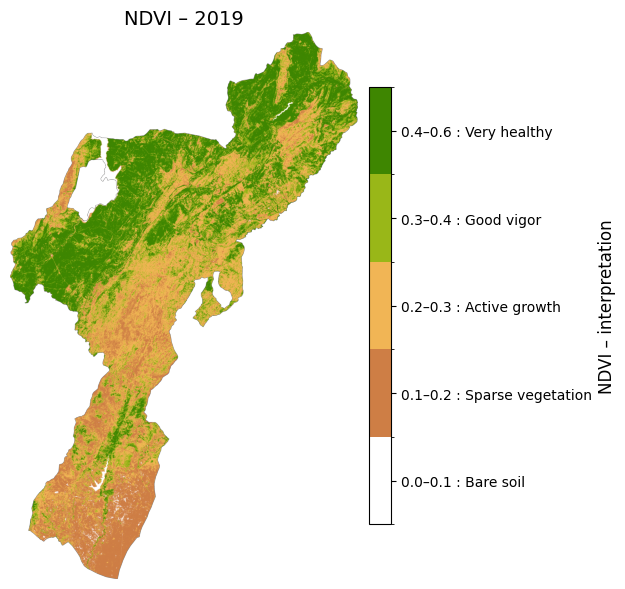

SAVI...


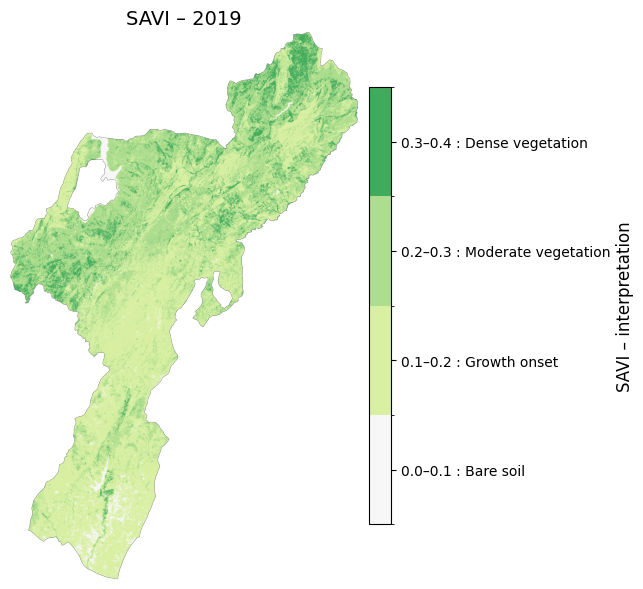

MSAVI...


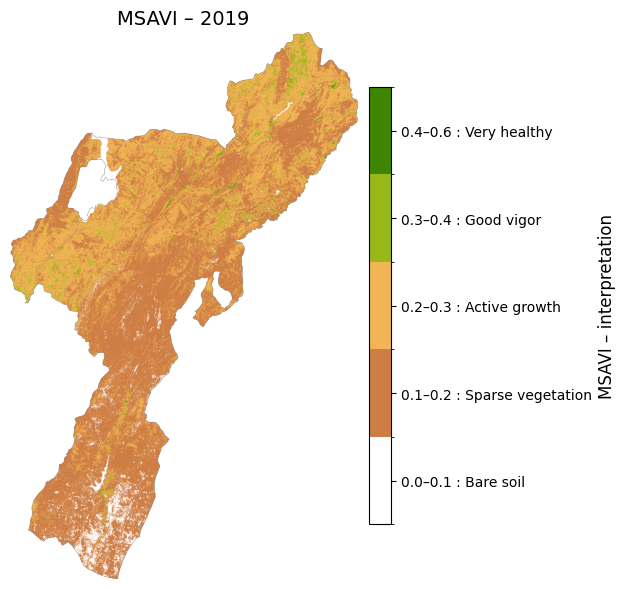

NDRE...


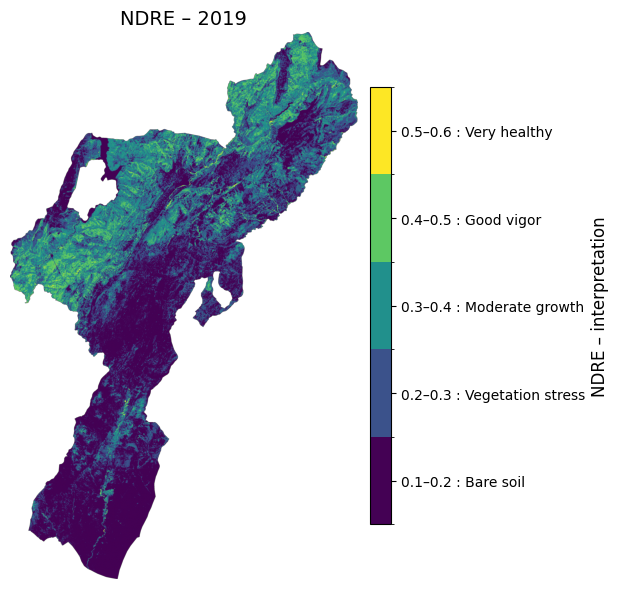

NDWI...


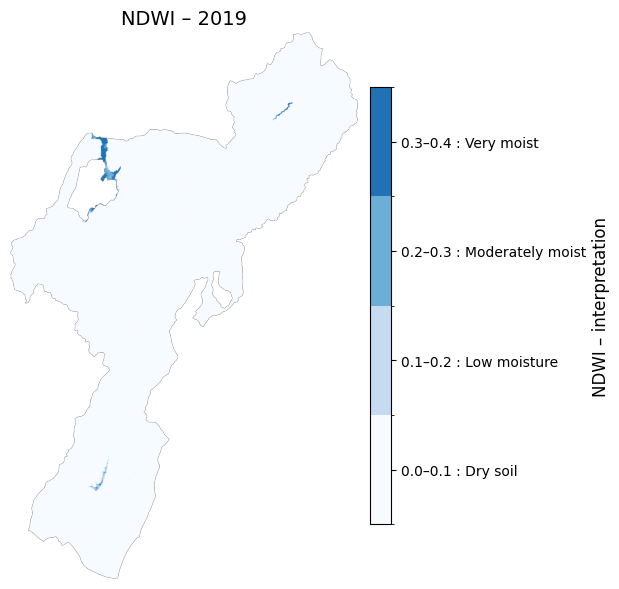

In [19]:
for name, path in rasters.items():
    print(f'{name}...')
    plot_index(name, path, styles[name])
